**Kat Tzioumakis – Guided Lab 1**

**EXERCISE 1**
**True Value of $\sqrt{2}$ = 1.414213562373**
**Approximate value of $\sqrt{2}$:**
$$
x_n = 1 + \frac{24}{60} + \frac{51}{60^2} + \frac{10}{60^3} = 1.41421296296
$$

**Absolute error:**
$$
e_n^{\mathrm{abs}} = |x_n - x| = |1.41421296296 - 1.414213562373| = 5.9941 \times 10^{-7}
$$

**Relative error:**
$$
e_n^{\mathrm{rel}} = \frac{|x_n - x|}{|x|} = |1.41421296296 - 1.414213562373| / |1.414213562373| = 4.2385 \times 10^{-7}
$$

**EXERCISE 2**
**Newton–Raphson method:**
$$
y_{n+1} = \frac{1}{2} \left( y_n + \frac{a}{y_n} \right), \quad a > 0
$$

Fixed point iteration: x is found when iteration quits changing a fixed point $y_{n+1} = y_n$
Let's plug in $y_n = \sqrt{a}$: 
$$
\begin{align*}
\frac{1}{2}\left(\sqrt{a} + \frac{a}{\sqrt{a}}\right) 
&= \frac{1}{2}\left(\sqrt{a} + \sqrt{a}\right) \\
&= \frac{1}{2} \cdot 2\sqrt{a} \\
&= \sqrt{a}
\end{align*}
$$

So $y_{n+1} = y_n = \sqrt{a}$ is a fixed point

**EXERCISE 3-4/commentary**
The following code includes the impementation of heron's method for 6 iterations, as well as the calculation of the true and absolute errors for exercise 4. 

Step 1: y(n) is 1.500000, a is 2.000000, result is 1.416667
True: abs = 2.4531e-03, Rel = 1.7346e-03
Approx: abs = 8.3333e-02, Rel = 5.8824e-02
Step 2: y(n) is 1.416667, a is 2.000000, result is 1.414216
True: abs = 2.1239e-06, Rel = 1.5018e-06
Approx: abs = 2.4510e-03, Rel = 1.7331e-03
Step 3: y(n) is 1.414216, a is 2.000000, result is 1.414214
True: abs = 1.5947e-12, Rel = 1.1276e-12
Approx: abs = 2.1239e-06, Rel = 1.5018e-06
Step 4: y(n) is 1.414214, a is 2.000000, result is 1.414214
True: abs = 2.2204e-16, Rel = 1.5701e-16
Approx: abs = 1.5949e-12, Rel = 1.1278e-12
Step 5: y(n) is 1.414214, a is 2.000000, result is 1.414214
True: abs = 2.2204e-16, Rel = 1.5701e-16
Approx: abs = 0.0000e+00, Rel = 0.0000e+00
Step 6: y(n) is 1.414214, a is 2.000000, result is 1.414214
True: abs = 2.2204e-16, Rel = 1.5701e-16
Approx: abs = 0.0000e+00, Rel = 0.0000e+00


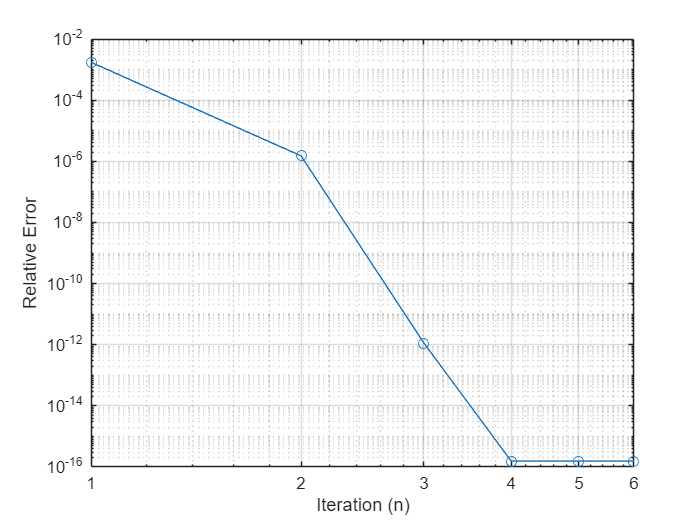

In [1]:
%herons algorithm
clear;
a = 2; %we're trying to approximate sqrt2
y0 = 1.5; %initial guess 
N = 6; %num of iterations

%allocate memory
y = zeros(N+1,1); %init with 0, n+1 bc of initial value

% set initial guess, matlab starts at 1 not 0
y(1) = y0;

true_value = sqrt(a);
abs_error = zeros(N+1,1);
rel_error = zeros(N+1,1);

approx_abs_error = zeros(N+1,1);
approx_rel_error = zeros(N+1,1);

for n=1:N
    y(n+1) = 0.5 * (y(n) + (a/y(n)));
    
    %true errors with sqrt built in func 
    abs_error(n+1) = abs(y(n+1) - true_value);
    rel_error(n+1) = abs_error(n+1) / abs(true_value);

    %approximate errors
    approx_abs_error(n+1) = abs(y(n+1) - y(n));
    approx_rel_error(n+1) = approx_abs_error(n+1)/abs(y(n+1));

    fprintf('Step %d: y(n) is %f, a is %f, result is %f\n', n, y(n), a, y(n+1));
    fprintf('True: abs = %.4e, Rel = %.4e\n', abs_error(n+1), rel_error(n+1));
    fprintf('Approx: abs = %.4e, Rel = %.4e\n', approx_abs_error(n+1), approx_rel_error(n+1));
end

%plot
figure;
loglog(1:N, rel_error(2:end), '-o');
xlabel('Iteration (n)');
ylabel('Relative Error');
grid on;

**Exercise 3 - interpretation**
Comparing different initial guesses $y_0$ that are close to the root, we see that it doesn't take long to approximate the real value. We validated our proof of the algorithm's quadratic convergence since the absolute error reduced from $10^{-3}$ to $10^{-12}$ in just 3 iterations. This implies that the method is not sensitive to the initial guess since it will correct an "off" initial guess very quickly. 

**Exercise 4 - interpretation**
Looking at the output of the code, we see that the approximate error is much larger than the true error. For example, in step 2, the true absolute error is $2.12\times 10^{-6}$, whereas the approximate absolute error is $2.45\times 10^{-3}$. This occurs because the true errors measure the distance from the actual root (true_val) ans since its convergence is quadratic, it will already be close to it. On the other hand, the approximate errors actually measure the distance between the step we are on and the previous one. 
So, if my approximate error is large, I assume that I will need more iterations to get to the true value. 

**Exercise 5**
$\delta_{n}$ is the relative error at the n-iteration

$$y_{n} = \sqrt{a}(1 + \delta_{n})$$

$$\sqrt{a}(1 + \delta_{n+1}) = \frac{1}{2} \left[ \sqrt{a}(1 + \delta_{n}) + \frac{a}{\sqrt{a}(1 + \delta_{n})} \right]$$

$$1 + \delta_{n+1} = \frac{1}{2} \left[ (1 + \delta_{n}) + \frac{1}{1 + \delta_{n}} \right]$$

$$1 + \delta_{n+1} = \frac{1}{2} \left[ \frac{(1 + \delta_{n})^{2} + 1}{1 + \delta_{n}} \right]$$

$$1 + \delta_{n+1} = \frac{1}{2} \left[ \frac{1 + 2\delta_{n} + \delta_{n}^{2} + 1}{1 + \delta_{n}} \right]$$

$$1 + \delta_{n+1} = \frac{1}{2} \left[ \frac{2(1 + \delta_{n}) + \delta_{n}^{2}}{1 + \delta_{n}} \right]$$

$$1 + \delta_{n+1} = 1 + \frac{\delta_{n}^{2}}{2(1 + \delta_{n})}$$

$$\delta_{n+1} = \frac{\delta_{n}^{2}}{2(1 + \delta_{n})}$$


Assuming $1 + \delta_{n} \approx 1$:

$$\delta_{n+1} \approx \frac{\delta_{n}^{2}}{2}$$

$$c = \frac{1}{2}$$


**Exercise 6**
Comparison of theoretical error estimate vs numerically derived error (relative)

Beginning from initial guess $y_0 = 1.5$, which has the initial relative error $\delta_{0} = 0.0660 \times 10^{-2}$, the theoretical error for step 1 is $1.8398\times 10^{-3}$. This value is very close to the computed relative error from Matlab of $1.7346\times 10^{-3}$. If we look at the next steps and compare, it is clear that the theoretically computed vs matlab computed errors seem almost identical. 


**Exercise 7-Code**
it is the same code as above, sole difference is number of iterations N=10

Step 1: y(n) is 1.500000, a is 2.000000, result is 1.416667
True: abs = 2.4531e-03, Rel = 1.7346e-03
Approx: abs = 8.3333e-02, Rel = 5.8824e-02
Step 2: y(n) is 1.416667, a is 2.000000, result is 1.414216
True: abs = 2.1239e-06, Rel = 1.5018e-06
Approx: abs = 2.4510e-03, Rel = 1.7331e-03
Step 3: y(n) is 1.414216, a is 2.000000, result is 1.414214
True: abs = 1.5947e-12, Rel = 1.1276e-12
Approx: abs = 2.1239e-06, Rel = 1.5018e-06
Step 4: y(n) is 1.414214, a is 2.000000, result is 1.414214
True: abs = 2.2204e-16, Rel = 1.5701e-16
Approx: abs = 1.5949e-12, Rel = 1.1278e-12
Step 5: y(n) is 1.414214, a is 2.000000, result is 1.414214
True: abs = 2.2204e-16, Rel = 1.5701e-16
Approx: abs = 0.0000e+00, Rel = 0.0000e+00
Step 6: y(n) is 1.414214, a is 2.000000, result is 1.414214
True: abs = 2.2204e-16, Rel = 1.5701e-16
Approx: abs = 0.0000e+00, Rel = 0.0000e+00
Step 7: y(n) is 1.414214, a is 2.000000, result is 1.414214
True: abs = 2.2204e-16, Rel = 1.5701e-16
Approx: abs = 0.0000e+00, Rel = 0.0

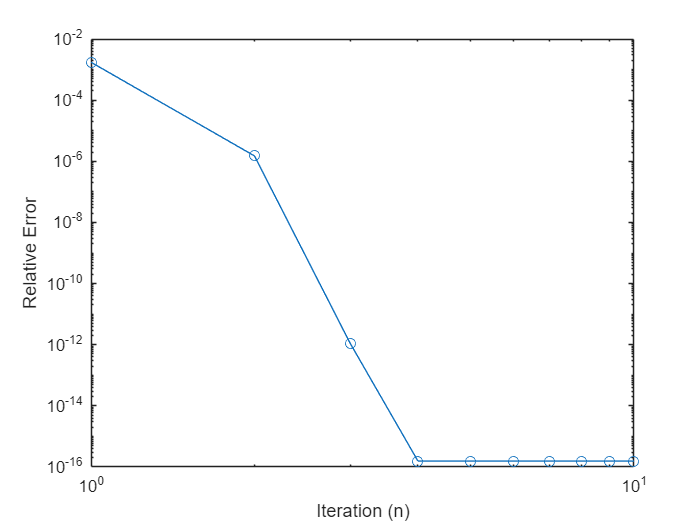

In [2]:
%herons algorithm
clear;
a = 2; %we're trying to approximate sqrt2
y0 = 1.5; %initial guess 
N = 10; %num of iterations

%allocate memory
y = zeros(N+1,1); %init with 0, n+1 bc of initial value

% set initial guess, matlab starts at 1 not 0
y(1) = y0;

true_value = sqrt(a);
abs_error = zeros(N+1,1);
rel_error = zeros(N+1,1);

approx_abs_error = zeros(N+1,1);
approx_rel_error = zeros(N+1,1);

for n=1:N
    y(n+1) = 0.5 * (y(n) + (a/y(n)));
    
    %true errors with sqrt built in func 
    abs_error(n+1) = abs(y(n+1) - true_value);
    rel_error(n+1) = abs_error(n+1) / abs(true_value);

    %approximate errors
    approx_abs_error(n+1) = abs(y(n+1) - y(n));
    approx_rel_error(n+1) = approx_abs_error(n+1)/abs(y(n+1));

    fprintf('Step %d: y(n) is %f, a is %f, result is %f\n', n, y(n), a, y(n+1));
    fprintf('True: abs = %.4e, Rel = %.4e\n', abs_error(n+1), rel_error(n+1));
    fprintf('Approx: abs = %.4e, Rel = %.4e\n', approx_abs_error(n+1), approx_rel_error(n+1));
end

%plot
figure;
loglog(1:N, rel_error(2:end), '-o');
xlabel('Iteration (n)');
ylabel('Relative Error');

**Exercise 7 - Interpretation**

The behavior of the computed error deviates from our theoretical prediction at iteration 4, where the relative true error reaches $1.5701\times 10^{-16}$. At this point, the iterations hit the precision floor of the floating point system. Computers cannot represent real numbers with more than 16 digits of accuracy and therefore cannot calculate the even smaller differences we can calculate theoretically. This is called the round-off error. 

By Step 5, the aproximate error becomes 0 since the values y4 and y5 seem identical to the computer's memory. It is our machine's way of stating that it has reacehd its maximum accuracy capacity.

**Exercise 8**
The iteration formula is given by:
$$y_{n+1} = y_n + y_n^2 - a$$

To prove that $y = \sqrt{a}$ is a fixed point, we assume $y_n = \sqrt{a}$ 
$$y_{n+1} = \sqrt{a} + (\sqrt{a})^2 - a$$

Since $(\sqrt{a})^2 = a$:
$$y_{n+1} = \sqrt{a} + a - a$$
$$y_{n+1} = \sqrt{a}$$

So, $y_{n+1} = y_n = \sqrt{a}$ is a fixed point.

In [ ]:
%Exercise 9
% algorithm 3
a=2; 
init_guesses = [1.1, 1.4, 1.5, 1.7, 1.8];

for i=1:length(init_guesses)
    y = init_guesses(i);
    fprintf('\n for initial guess: %.1f\n', y);
    for n = 1:6
        y = y +y^2 -a;
        
        fprintf('step %d: %.4e\n',n,y);
    end
end



 for initial guess: 1.1
step 1: 3.1000e-01
step 2: -1.5939e+00
step 3: -1.0534e+00
step 4: -1.9438e+00
step 5: -1.6554e-01
step 6: -2.1381e+00

 for initial guess: 1.4
step 1: 1.3600e+00
step 2: 1.2096e+00
step 3: 6.7273e-01
step 4: -8.7470e-01
step 5: -2.1096e+00
step 6: 3.4081e-01

 for initial guess: 1.5
step 1: 1.7500e+00
step 2: 2.8125e+00
step 3: 8.7227e+00
step 4: 8.2807e+01
step 5: 6.9379e+03
step 6: 4.8141e+07

 for initial guess: 1.7
step 1: 2.5900e+00
step 2: 7.2981e+00
step 3: 5.8560e+01
step 4: 3.4859e+03
step 5: 1.2155e+07
step 6: 1.4774e+14

 for initial guess: 1.8
step 1: 3.0400e+00
step 2: 1.0282e+01
step 3: 1.1399e+02
step 4: 1.3106e+04
step 5: 1.7179e+08
step 6: 2.9512e+16


**Exercise 9-Interpretation**
We see a few interesting results for different initial guesses. 
For initial guesses below the true value of $\sqrt{2}$, the sequence of numbers for each iteration seem to bounce between positive and negative values, possibly even shooting to negative infinity after many iterations. When our initial guesses are larger than $\sqrt{2}$, each guess increases and we get really large numbers after just a few iterations that are extremely far off from the actual value. Thus, the shoot to positive infinity pretty quickly. 
The interesting part is the initial guess $y_0=1.4$ which is really close to the actual root since it moves away from the root after the first iteration and continues to drop to negative values, so it also diverges. 
These numbers prove that this algorithm is unstable, since if we start at any point that is not the fixed point, it diverges. 

**Exercise 10**
Explore error and convergence: write the code, run it, keep records of the errors, compare convergence. 

In [4]:
%exercise 10-method A
%clc
a=2;
true_value=sqrt(a);
y0 = 1.5;
N=10;

y = zeros(N+1,1); %init with 0, n+1 bc of initial value
approx_abs_error = zeros(N+1,1);
abs_error = zeros(N+1,1);

y(1)=y0;


for n=1:N
    y(n+1) = 0.25*(3*y(n) +a/y(n));

    approx_abs_error(n+1) = abs(y(n+1) - y(n));
    abs_error(n+1) = abs(y(n+1) - true_value);

    fprintf('Step %d: y(n) is %f, a is %f, result is %f\n', n, y(n), a, y(n+1));
    fprintf('Approximate absolute error: %.4f\n',approx_abs_error(n+1));
    fprintf('Absolute error: %.4f\n',abs_error(n+1));

end

Step 1: y(n) is 1.500000, a is 2.000000, result is 1.458333
Approximate absolute error: 0.0417
Absolute error: 0.0441
Step 2: y(n) is 1.458333, a is 2.000000, result is 1.436607
Approximate absolute error: 0.0217
Absolute error: 0.0224
Step 3: y(n) is 1.436607, a is 2.000000, result is 1.425498
Approximate absolute error: 0.0111
Absolute error: 0.0113
Step 4: y(n) is 1.425498, a is 2.000000, result is 1.419878
Approximate absolute error: 0.0056
Absolute error: 0.0057
Step 5: y(n) is 1.419878, a is 2.000000, result is 1.417051
Approximate absolute error: 0.0028
Absolute error: 0.0028
Step 6: y(n) is 1.417051, a is 2.000000, result is 1.415634
Approximate absolute error: 0.0014
Absolute error: 0.0014
Step 7: y(n) is 1.415634, a is 2.000000, result is 1.414924
Approximate absolute error: 0.0007
Absolute error: 0.0007
Step 8: y(n) is 1.414924, a is 2.000000, result is 1.414569
Approximate absolute error: 0.0004
Absolute error: 0.0004
Step 9: y(n) is 1.414569, a is 2.000000, result is 1.414

Looking at the absolute error of this method, it is almost cut in half after each iteration, so it demonstrates linear convergence at a rate of 1/2. This method seems to be working very well, as in the last iteration the value calculated for the square root is very close to the real value that matlab gives us. However, it is slower than Heron's method, since with Heron's method the error was squared whereas here it is halved at each step. 

In [ ]:
%exercise 10-method B
%clc
a=2;
true_value=sqrt(a);
z0 = 1.5;
N=10;

z = zeros(N+1,1); %init with 0, n+1 bc of initial value
approx_abs_error = zeros(N+1,1);
abs_error = zeros(N+1,1);

z(1)=y0;


for n=1:N
    term_a = 3*z(n);
    term_b = 12 / z(n);
    term_c = 4 / (z(n)^3);

    z(n+1) = (1/8) * (term_a + term_b - term_c);

    approx_abs_error(n+1) = abs(z(n+1) - z(n));
    abs_error(n+1) = abs(z(n+1) - true_value);

    fprintf('Step %d: z(n) is %f, a is %f, result is %f\n', n, z(n), a, z(n+1));
    fprintf('Approximate absolute error: %.4f\n',approx_abs_error(n+1));
    fprintf('Absolute error: %.4f\n',abs_error(n+1));

end

Step 1: z(n) is 1.500000, a is 2.000000, result is 1.414352
Approximate absolute error: 0.0856
Absolute error: 0.0001
Step 2: z(n) is 1.414352, a is 2.000000, result is 1.414214
Approximate absolute error: 0.0001
Absolute error: 0.0000
Step 3: z(n) is 1.414214, a is 2.000000, result is 1.414214
Approximate absolute error: 0.0000
Absolute error: 0.0000
Step 4: z(n) is 1.414214, a is 2.000000, result is 1.414214
Approximate absolute error: 0.0000
Absolute error: 0.0000
Step 5: z(n) is 1.414214, a is 2.000000, result is 1.414214
Approximate absolute error: 0.0000
Absolute error: 0.0000
Step 6: z(n) is 1.414214, a is 2.000000, result is 1.414214
Approximate absolute error: 0.0000
Absolute error: 0.0000
Step 7: z(n) is 1.414214, a is 2.000000, result is 1.414214
Approximate absolute error: 0.0000
Absolute error: 0.0000
Step 8: z(n) is 1.414214, a is 2.000000, result is 1.414214
Approximate absolute error: 0.0000
Absolute error: 0.0000
Step 9: z(n) is 1.414214, a is 2.000000, result is 1.414

This method seems to be very powerful, since the error goes quickly to 0; it reaches machine precision within 2 steps. This method seems to have cubic convergence since it triples the number of correct digits every step. It is quicker that Heron's method and gets to the true value extremely fast. 

https://brilliant.org/wiki/approximation-of-square-roots/
This method is the first one mentioned. It seems to be a modification of the Newton-Raphson method but with a different denominator. $\text{Approximation} = \sqrt{p} + \frac{q}{2\sqrt{p} + 1}$

Here, there is an extra constraint, since n can be written as p+q, where p has to be the largest perfect square less that n and q can be any real number. So our starting point will be 1, not 1.5 like before. 
We could start at 1.5, but the term will most likely correct itself. We will run it both ways to see. 

In [ ]:
%Exercise 10 - Method C with starting point integer
%clc

a=2;
N=10;
x = zeros(N+1, 1);
x(1) = 1.0;
true_value = sqrt(a);

approx_abs_error = zeros(N+1,1);
abs_error = zeros(N+1,1);

for n=1:N
    num = a - x(n)^2;
    denom = 2*x(n) +1;

    x(n+1) = x(n) + (num/denom);

    approx_abs_error(n+1) = abs(x(n+1) - x(n));
    abs_error(n+1) = abs(true_value - x(n+1));

    fprintf('Step %d: z(n) is %f, a is %f, result is %f\n', n, x(n), a, x(n+1));
    fprintf('Approximate absolute error: %.4f\n',approx_abs_error(n+1));
    fprintf('Absolute error: %.4f\n',abs_error(n+1));

end

Step 1: z(n) is 1.000000, a is 2.000000, result is 1.333333
Approximate absolute error: 0.3333
Absolute error: 0.0809
Step 2: z(n) is 1.333333, a is 2.000000, result is 1.393939
Approximate absolute error: 0.0606
Absolute error: 0.0203
Step 3: z(n) is 1.393939, a is 2.000000, result is 1.408970
Approximate absolute error: 0.0150
Absolute error: 0.0052
Step 4: z(n) is 1.408970, a is 2.000000, result is 1.412847
Approximate absolute error: 0.0039
Absolute error: 0.0014
Step 5: z(n) is 1.412847, a is 2.000000, result is 1.413857
Approximate absolute error: 0.0010
Absolute error: 0.0004
Step 6: z(n) is 1.413857, a is 2.000000, result is 1.414120
Approximate absolute error: 0.0003
Absolute error: 0.0001
Step 7: z(n) is 1.414120, a is 2.000000, result is 1.414189
Approximate absolute error: 0.0001
Absolute error: 0.0000
Step 8: z(n) is 1.414189, a is 2.000000, result is 1.414207
Approximate absolute error: 0.0000
Absolute error: 0.0000
Step 9: z(n) is 1.414207, a is 2.000000, result is 1.414

this method clearly exhibits Linear convergence since the absolute error is roughly reduced by 1/4 at each iteration. So convergence rate is roughly 1/4. This algorithm is faster that method A which was introduced in the beggining of Exercise 10, but still slower than both Heron's and method B. 

In [7]:
%Exercise 10 - Method C with starting point 1.5
%clc

a=2;
N=10;
x = zeros(N+1, 1);
x(1) = 1.5;
true_value = sqrt(a);

approx_abs_error = zeros(N+1,1);
abs_error = zeros(N+1,1);

for n=1:N
    num = a - x(n)^2;
    denom = 2*x(n) +1;

    x(n+1) = x(n) + (num/denom);

    approx_abs_error(n+1) = abs(x(n+1) - x(n));
    abs_error(n+1) = abs(true_value - x(n+1));

    fprintf('Step %d: z(n) is %f, a is %f, result is %f\n', n, x(n), a, x(n+1));
    fprintf('Approximate absolute error: %.4f\n',approx_abs_error(n+1));
    fprintf('Absolute error: %.4f\n',abs_error(n+1));

end

Step 1: z(n) is 1.500000, a is 2.000000, result is 1.437500
Approximate absolute error: 0.0625
Absolute error: 0.0233
Step 2: z(n) is 1.437500, a is 2.000000, result is 1.420363
Approximate absolute error: 0.0171
Absolute error: 0.0061
Step 3: z(n) is 1.420363, a is 2.000000, result is 1.415824
Approximate absolute error: 0.0045
Absolute error: 0.0016
Step 4: z(n) is 1.415824, a is 2.000000, result is 1.414635
Approximate absolute error: 0.0012
Absolute error: 0.0004
Step 5: z(n) is 1.414635, a is 2.000000, result is 1.414324
Approximate absolute error: 0.0003
Absolute error: 0.0001
Step 6: z(n) is 1.414324, a is 2.000000, result is 1.414242
Approximate absolute error: 0.0001
Absolute error: 0.0000
Step 7: z(n) is 1.414242, a is 2.000000, result is 1.414221
Approximate absolute error: 0.0000
Absolute error: 0.0000
Step 8: z(n) is 1.414221, a is 2.000000, result is 1.414216
Approximate absolute error: 0.0000
Absolute error: 0.0000
Step 9: z(n) is 1.414216, a is 2.000000, result is 1.414

Running the same algorith with the same starting point that we used in all the other algorithms, so 1.5 we see that it still manages to run the same way, even reaching machine precision a step earlier than when we ran it the way it was defined. So same linear convergence with a convergence rate of 1/4. 